# Polinomio interpolante de Hermite

En algunas ocasiones además de la información del valor de la función en los nodos, también tenemos el valor de alguna de sus derivadas. Para simplificar notación, supongamos que tenemos la misma cantidad de información en cada nodo. Conocemos los siguientes $(m+1)(n+1)$ pares
$$
\begin{array}{cccc}
(x_0,f(x_0)),& (x_1,f(x_1)),& \ldots &(x_n,f(x_n)),\\
(x_0,f'(x_0)),& (x_1,f'(x_1)),& \ldots &(x_n,f'(x_n)),\\
\vdots & \vdots &  &\vdots\\
(x_0,f^{(m)}(x_0)),& (x_1,f^{(m)}(x_1)),& \ldots &(x_n,f^{(m)}(x_n)),
\end{array}
$$
donde $x_i\neq x_j$ para $i\neq j$.

Para aprovechar toda la información disponible, el polinomio de Hermite $p$ para esos datos va a tener grado a lo sumo $(m+1)(n+1)-1$ y cumplir que
$$
p(x_i)=f(x_i),\quad p'(x_i)=f'(x_i),\quad \ldots p^{(m)}(x_i)=f^{(m)}(x_i), 
$$
para $i=0,\ldots,n$.

La manera más simple de calcular el polinomio de Hermite es mediante el polinomio de Newton para los pares
$$
\left\{(\tilde{x}_k,\tilde{y}_k)\right\}_{k=0}^{\tilde{n}},
$$
donde $\tilde{n}=n+(n+1)m=(m+1)(n+1)-1$, con
$$
\tilde{x}_{i+(n+1)j}=x_i, \quad \tilde{y}_{i+(n+1)j}=f^{(j)}(x_i),
$$
para $i=0,\ldots,n$ y $j=0,\ldots,m$. Obteniendo de esta forma
$$
p(x)=c_0+c_1(x-\tilde{x}_0)+c_2(x-\tilde{x}_0)(x-\tilde{x}_1)\ldots + c_{\tilde{n}}(x-\tilde{x}_0)\ldots (x-\tilde{x}_{\tilde{n}-1}),
$$
donde
$$
c_k=f[\tilde{x}_0,\ldots,\tilde{x}_k].
$$

Recordemos que las diferencias divididas de orden cero se definen como 
$$
f[\tilde{x}_k]=\tilde{y}_k,\quad\textrm{para }k=0,\ldots,\tilde{n},
$$
y las de orden $k$ como
$$
f[\tilde{x}_i,\tilde{x}_{i+1},\ldots,\tilde{x}_{i+k-1},\tilde{x}_{i+k}]=\frac{f[\tilde{x}_{i+1},\ldots,\tilde{x}_{i+k}]-f[\tilde{x}_i,\ldots,\tilde{x}_{i+k-1}]}{\tilde{x}_{i+k}-\tilde{x}_i},\quad\textrm{para }i=0,\ldots,\tilde{n}-k.
$$
Claramente esta definición es válida si $\tilde{x}_i\neq\tilde{x}_j$ para $i\neq j$. 

Para obtener una fórmula válida cuando $\tilde{x}_i=\tilde{x}_j$, utilizaremos la estimación del error
$$
f[\tilde{x}_{0},\ldots ,\tilde{x}_{k}]=\frac{f^{(k)}(\xi)}{k!},
$$
con $\xi$ en el intervalo más pequeño que contiene a $\tilde{x}_0,\ldots,\tilde{x}_{k}$. Por lo tanto,
$$
f[\underbrace{\tilde{x}_{0},\ldots ,\tilde{x}_{0}}_{k+1}]=\frac{f^{(k)}(\tilde{x}_{0})}{k!}.
$$
De esta manera, podemos ralizar las cuentas de las diferencias divididas inclusive cuando hay nodos repetidos.

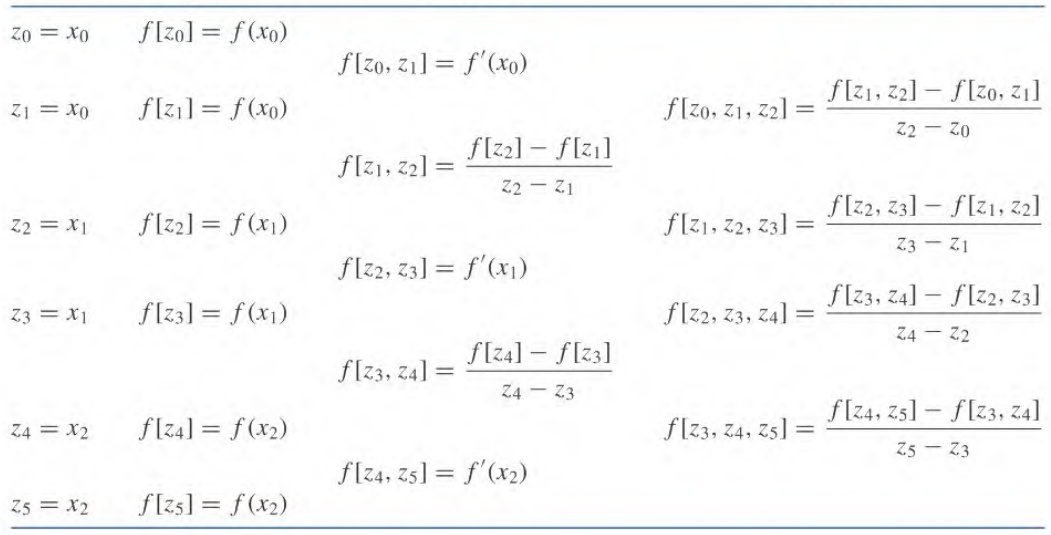

In [14]:
from IPython.display import Image
Image(filename='dd.png')

---
## Ejemplo

Queremos extender el dominio de la función $f(x)=-\log(x)$ a toda la recta. Para ello proponemos hallar un polinomio $p$ tal que la función
$$
\bar{f}(x)=\left\{\begin{array}{ll}
f(x),&\textrm{si }x >1,\\
p(x),&\textrm{si }x \leq 1,
\end{array}\right.
$$
sea dos veces continuamente diferenciable.

De estas condiciones, se deduce que
$$
p(1)=f(1)=0,\quad p'(1)=f'(1)=-1,\quad p''(1)=f''(1)=1. 
$$
Por lo tanto, podemos definir $p$ como un polinomio interpolante de Hermite
\begin{eqnarray*}
p(x)&=&f[1]+f[1,1](x-1)+f[1,1,1](x-1)^2\\
&=&f(1)+f'(1)(x-1)+\frac{f''(1)}{2}(x-1)^2\\
&=&-(x-1)+\frac{1}{2}(x-1)^2.
\end{eqnarray*}

La matriz de diferencias divididas para calcular este polinomio sería

$ $|$0$|$1$|$2$
---|---|---|---
0  |$f[1]$| | 
1  |$f[1]$|$f[1,1]$ | 
2  |$f[1]$|$f[1,1]$ |$f[1,1,1]$ 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def fun_barlog(x):
  if x>1:
    f=-np.log(x)
  else:
    f=0.5
    f=-1+(x-1)*f
    f=(x-1)*f
  return f

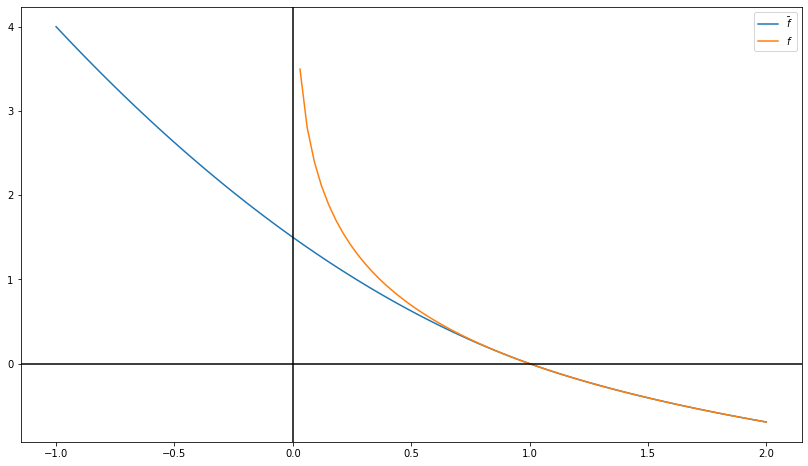

In [5]:
x=np.linspace(-1,2,100)
fvec=np.vectorize(fun_barlog)
xpos=[x[i] for i in range(len(x)) if x[i]>0]

plt.figure(figsize=(14, 8))
plt.plot(x,fvec(x),label='$\\bar{f}$')
plt.plot(xpos,-np.log(xpos),label='$f$')
plt.axhline(y=0,color='k')
plt.axvline(x=0,color='k')
plt.legend();

## Ejemplo

La mayoría de los programas de edición gráfica cuentan con una herramienta para realizar curvas planas. Uno debe detallar el punto (par ordenado) de origen $(x_0,y_0)$ y el punto de destino $(x_1,y_1)$. Generalmente éstos vienen acompañados de un punto guía que determina la pendiente de salida desde el punto origen $(x_0+p_0,y_0+q_0)$ y la pendiente de llegada al punto destino $(x_1-p_1,y_1-q_1)$. Detallados en el gráfico de abajo.

Lo que los programas de edición le mostraran es la gráfica de la curva plana
$$
(x(t),y(t))\quad \textrm{para}\quad t\in [0,1],
$$
donde $x$ es un polinomio interpolante de Hermite que satisface
$$
x(0)=x_0,\quad x'(0)=p_0,\quad x(1)=x_1,\quad x'(1)=p_1,
$$
y donde $y$ es un polinomio interpolante de Hermite que satisface
$$
y(0)=y_0,\quad y'(0)=q_0,\quad y(1)=y_1,\quad y'(1)=q_1.
$$


Calculemos el polinomio $x$ (de obtiene $y$ de manera análoga). Sabemos que
$$
x(t)=c_0+c_1 (t-0)+c2 (t-0)(t-0)+c_3 (t-0)(t-0)(t-1),
$$
donde los coeficientes podemos determinarlos con las diferencias divididas


$ $|$0$|$1$|$2$|$3$
---|---|---|---|---
0  |$x[0]=x_0$| | |
1  |$x[0]=x_0$|$x[0,0]=p_0$ | |
2  |$x[1]=x_1$|$x[0,1]=x_1-x_0$ |$x[0,0,1]=x_1-x_0-p_0$ | 
3  |$x[1]=x_1$|$x[1,1]=p_1$ |$x[0,1,1]=p_1-(x_1-x_0)$ |$x[0,0,1,1]=p_1-2(x_1-x_0)+p_0$

Por lo tanto
$$
x(t)=x_0+p_0 t + (x_1-x_0-p_0)t^2 + (p_1-2(x_1-x_0)+p_0)t^2(t-1).
$$

Veamos ésto gráficamente.


In [6]:
x0,y0=1,2
p0,q0=0.5,1
x1,y1=3,1
p1,q1=-2,-1

In [7]:
def parHermite(t,x0,p0,x1,p1):
  x=p1-2*(x1-x0)+p0
  x=x1-x0-p0 + (t-1)*x
  x=p0 + t*x
  x=x0 + t*x
  return x

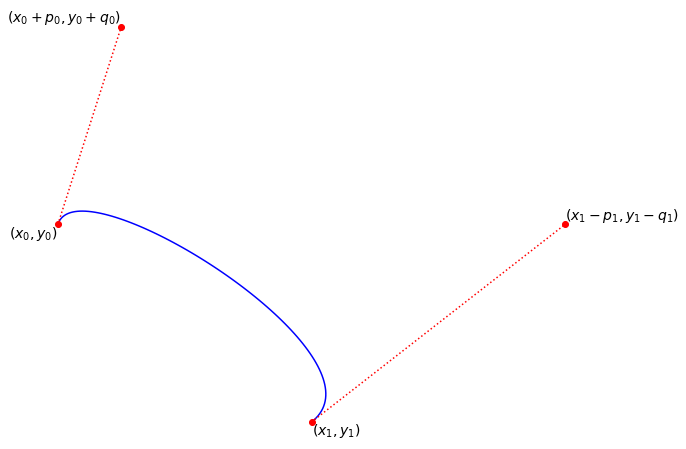

In [10]:
t=np.linspace(0,1,100)
param=np.vectorize(parHermite)
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.plot(param(t,x0,p0,x1,p1),param(t,y0,q0,y1,q1),'b')
plt.plot([x0,x0+p0],[y0,y0+q0], 'ro:')
plt.plot([x1,x1-p1],[y1,y1-q1], 'ro:')
plt.text(x0,y0,'$(x_0,y_0)$',fontsize=14,horizontalalignment='right',verticalalignment='top')
plt.text(x1,y1,'$(x_1,y_1)$',fontsize=14,horizontalalignment='left',verticalalignment='top')
plt.text(x0+p0,y0+q0,'$(x_0+p_0,y_0+q_0)$',fontsize=14,horizontalalignment='right',verticalalignment='bottom')
plt.text(x1-p1,y1-q1,'$(x_1-p_1,y_1-q_1)$',fontsize=14,horizontalalignment='left',verticalalignment='bottom');

En particular, si multiplicamos las pendientes por $3$, o sea $x'(0)=3p_0$, $x'(1)=3p_1$, $y'(0)=3q_0$ e $y'(1)=3q_1$, ésta coincide con la **curva cúbica de Bézier**.

In [12]:
%%html
<embed src="https://www.geogebra.org/m/xwgbdyks" height=700 width=800>

# Interpolación mediante splines

En algunos libros pueden encontrar traducido *spline* como cercha. La idea de este tipo de aproximación es utilizar una función polinomial a trozos lo más suave posible que pase por los pares
$$
(x_0,f(x_0)),\quad (x_1,f(x_1)),\quad \ldots,\quad (x_n,f(x_n)).
$$

Por ejemplo, un *spline* lineal se define como la función
$$
S(x)=\left\{\begin{array}{ll}
a_0x+b_0,&\textrm{si }x\in[x_0,x_1),\\
a_1x+b_1,&\textrm{si }x\in[x_1,x_2),\\
\quad\vdots&\\
a_{n-1}x+b_{n-1},&\textrm{si }x\in[x_{n-1},x_n),\\
\end{array} \right.
$$
que cumpla
$$
S(x_i)=f(x_i)\quad\textrm{para}\quad i=0,\ldots,n
$$
y que sea continua, i.e.,
$$
S(x_j^{-})=S(x_j)\quad\textrm{para}\quad j=1,\ldots,n-1,
$$
donde $S(x_j^{-})=\lim_{x\to x_j^{-}} S(x)$. 
Note que por un lado tenemos **$2n$ incógnitas** $a_i,b_i$ para $i=0,\ldots,n-1$ y por otro lado **$2n$ ecuaciones** ($n+1$ de ajuste de datos y $n-1$ de suavidad).

Uno de los más utilizados para aproximar curvas es el *spline* cúbico, que se define como
$$
S(x)=\left\{\begin{array}{ll}
a_0x^3+b_0x^2+c_0x+d_0,&\textrm{si }x\in[x_0,x_1),\\
a_1x^3+b_1x^2+c_1x+d_1,&\textrm{si }x\in[x_1,x_2),\\
\quad\vdots&\\
a_{n-1}x^3+b_{n-1}x^2+c_{n-1}x+d_{n-1},&\textrm{si }x\in[x_{n-1},x_n),\\
\end{array} \right.
$$
que cumpla 
$$
S(x_i)=f(x_i)\quad\textrm{para}\quad i=0,\ldots,n
$$
y que sea dos veces diferenciables, i.e.,
$$
\begin{array}{c}
S(x_j^{-})=S(x_j)\quad \textrm{para}\quad j=1,\ldots,n-1,\\
S'(x_j^{-})=S'(x_j)\quad \textrm{para}\quad j=1,\ldots,n-1,\\
S''(x_j^{-})=S''(x_j)\quad \textrm{para}\quad j=1,\ldots,n-1.
\end{array}
$$
Note que tenemos **$4n$ incógnitas** y **$4n-2$ ecuaciones** ($n+1$ de ajuste y $3(n-1)$ de suavidad). Para definir las $2$ ecuaciones restantes se suele agregar una de las siguiente:
 * $S''(x_0)=0$ y $S''(x_n)=0$, condición natural o de extremos libres.
 * $S'(x_0)=f'(x_0)$ y $S'(x_n)=f'(x_n)$, condición exacta o de extremos fijos.

 



## Ejemplo

Veamos la diferencia entre la aproximación del *spline* de grado uno y la dada por el poninomio interpolante de Lagrange. Para este ejemplo tomaremos los datos reales de cantidad acumulada de infectados por día y la aproximaremos usando datos a cada 10 días.

In [ ]:
# casos por día sacados de gráfico de lavoz.com.ar
Flourish_data = {"data":[{"label":"06/03/2020","value":["1"]},{"label":"07/03/2020","value":["0"]},{"label":"08/03/2020","value":["0"]},{"label":"09/03/2020","value":["0"]},{"label":"10/03/2020","value":["0"]},{"label":"11/03/2020","value":["0"]},{"label":"12/03/2020","value":["1"]},{"label":"13/03/2020","value":["0"]},{"label":"14/03/2020","value":["0"]},{"label":"15/03/2020","value":["0"]},{"label":"16/03/2020","value":["0"]},{"label":"17/03/2020","value":["2"]},{"label":"18/03/2020","value":["1"]},{"label":"19/03/2020","value":["3"]},{"label":"20/03/2020","value":["5"]},{"label":"21/03/2020","value":["4"]},{"label":"22/03/2020","value":["8"]},{"label":"23/03/2020","value":["3"]},{"label":"24/03/2020","value":["7"]},{"label":"25/03/2020","value":["15"]},{"label":"26/03/2020","value":["3"]},{"label":"27/03/2020","value":["5"]},{"label":"28/03/2020","value":["1"]},{"label":"29/03/2020","value":["18"]},{"label":"30/03/2020","value":["8"]},{"label":"31/03/2020","value":["14"]},{"label":"01/04/2020","value":["6"]},{"label":"02/04/2020","value":["18"]},{"label":"03/04/2020","value":["14"]},{"label":"04/04/2020","value":["4"]},{"label":"05/04/2020","value":["5"]},{"label":"06/04/2020","value":["7"]},{"label":"07/04/2020","value":["4"]},{"label":"08/04/2020","value":["1"]},{"label":"09/04/2020","value":["5"]},{"label":"10/04/2020","value":["13"]},{"label":"11/04/2020","value":["32"]},{"label":"12/04/2020","value":["6"]},{"label":"13/04/2020","value":["4"]},{"label":"14/04/2020","value":["11"]},{"label":"15/04/2020","value":["6"]},{"label":"16/04/2020","value":["12"]},{"label":"17/04/2020","value":["6"]},{"label":"18/04/2020","value":["2"]},{"label":"19/04/2020","value":["11"]},{"label":"20/04/2020","value":["0"]},{"label":"21/04/2020","value":["1"]},{"label":"22/04/2020","value":["4"]},{"label":"23/04/2020","value":["2"]},{"label":"24/04/2020","value":["2"]},{"label":"25/04/2020","value":["1"]},{"label":"26/04/2020","value":["3"]},{"label":"27/04/2020","value":["2"]},{"label":"28/04/2020","value":["2"]},{"label":"29/04/2020","value":["0"]},{"label":"30/04/2020","value":["3"]},{"label":"01/05/2020","value":["13"]}]}
# cálculo de casos acumulados por día
nd=len(Flourish_data["data"])
cacum=[int(Flourish_data["data"][0]["value"][0])]
for d in range(1,nd):
  cacum=cacum+[cacum[-1]+int(Flourish_data["data"][d]["value"][0])]


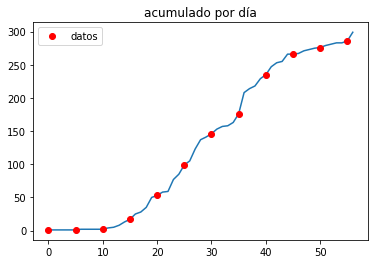

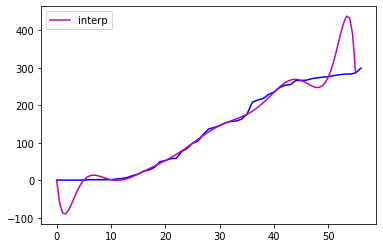

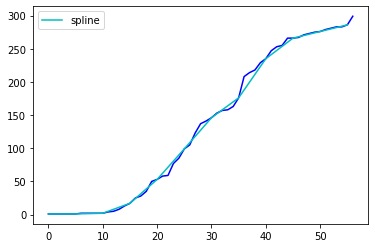

In [ ]:
# datos a cada md días
md=5
diadato=[i for i in range(0,nd,md)]
acumdato=[cacum[i] for i in range(0,nd,md)]

# Comparemos como queda el polinomio interpolante de Lagrange/Newton comparado
# con el spline de grado 1
import compu2020 as c20

plt.figure()
plt.plot(cacum)
plt.title("acumulado por día")
plt.plot(diadato,acumdato,'ro',label='datos')
plt.legend();

dias=np.linspace(diadato[0],diadato[-1],100)
plt.figure()
pL=c20.interpLagrange(diadato,acumdato,dias)
plt.plot(range(nd),cacum,'b')
plt.plot(dias,pL,'m',label='interp')
plt.legend()

plt.figure()
plt.plot(range(nd),cacum,'b')
plt.plot(diadato,acumdato,'c',label='spline')
plt.legend();


---
# Veamos como se resolvían algunos [ejercicios del primer parcial](https://colab.research.google.com/drive/19RolejLMc_q6oadeuDlGO9BE5R47d4WZ).